In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 47s 120ms/step - loss: 1.4513 - accuracy: 0.4785 - val_loss: 1.1544 - val_accuracy: 0.5941
Epoch 2/10
391/391 [==============================] - 50s 128ms/step - loss: 0.9875 - accuracy: 0.6531 - val_loss: 0.9538 - val_accuracy: 0.6620
Epoch 3/10
391/391 [==============================] - 51s 130ms/step - loss: 0.7829 - accuracy: 0.7254 - val_loss: 0.8026 - val_accuracy: 0.7235
Epoch 4/10
391/391 [==============================] - 51s 131ms/step - loss: 0.6277 - accuracy: 0.7800 - val_loss: 0.8375 - val_accuracy: 0.7156
Epoch 5/10
391/391 [==============================] - 52s 132ms/step - loss: 0.4896 - accuracy: 0.8282 - val_loss: 0.7623 - val_accuracy: 0.7469
Epoch 6/10
391/391 [==============================] - 52s 133ms/step - loss: 0.3532 - accuracy: 0.8773 - val_loss: 0.8073 - val_accuracy: 0.7522
Epoch 7/10
391/391 [==============================] - 52s 133ms/step - loss: 0.2337 - accuracy: 0.9193 - val_loss: 0.9502 - val_ac

In [17]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.451300,0.47848,1.154363,0.5941
1,0.987531,0.65308,0.953781,0.6620
2,0.782896,0.72538,0.802644,0.7235
3,0.627688,0.77998,0.837528,0.7156
4,0.489586,0.82820,0.762284,0.7469


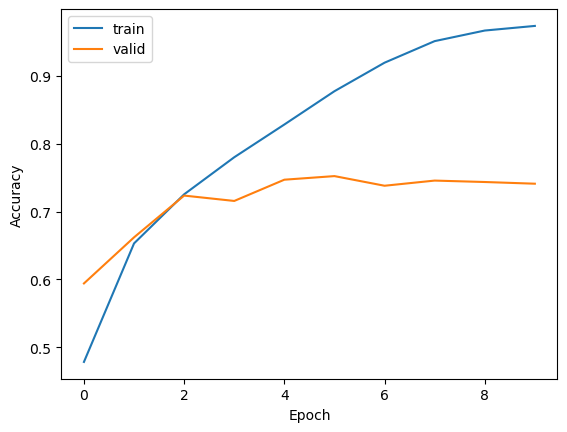

In [18]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

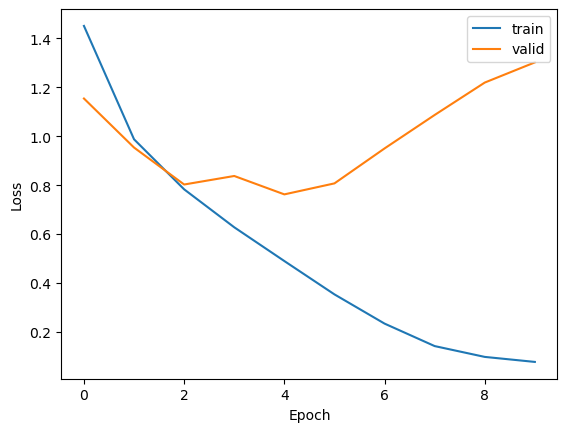

In [19]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

In [20]:
model.save("cifat10.h5")

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 1.3022 - accuracy: 0.7410
Test accuracy: 0.7409999966621399
